Dataset loaded successfully ✅
Shape of dataset: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

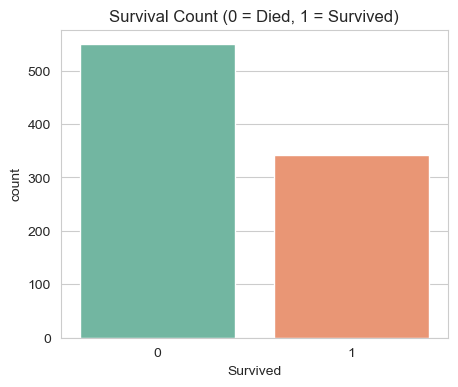

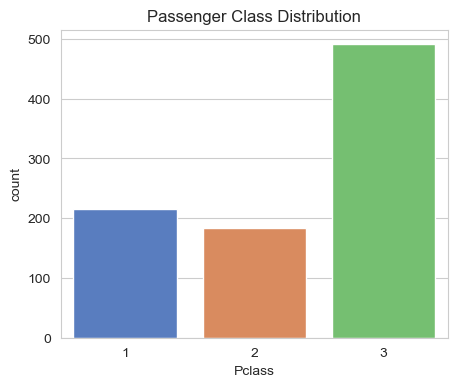

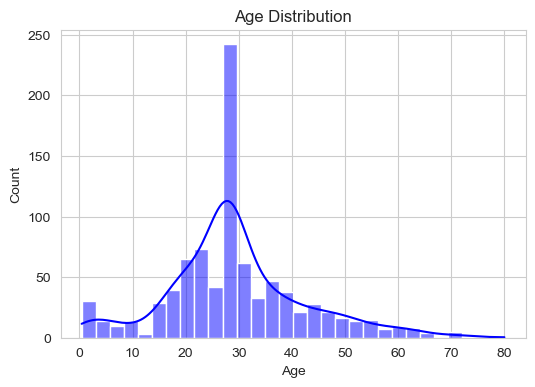

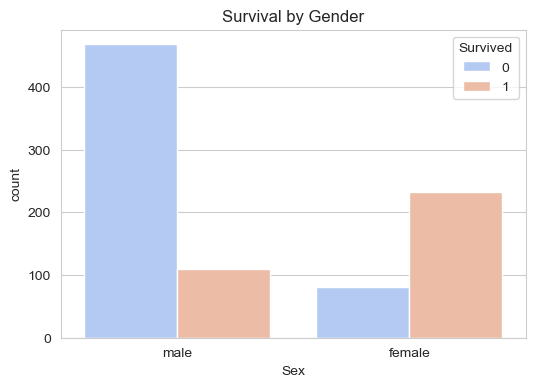

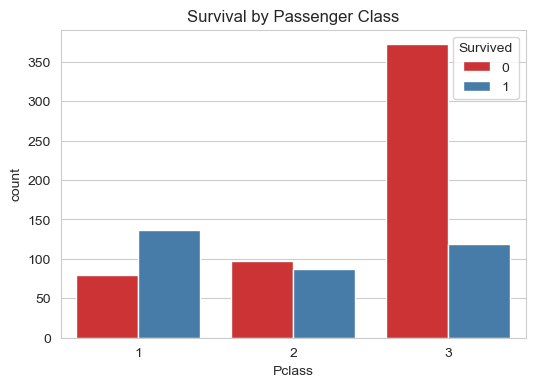

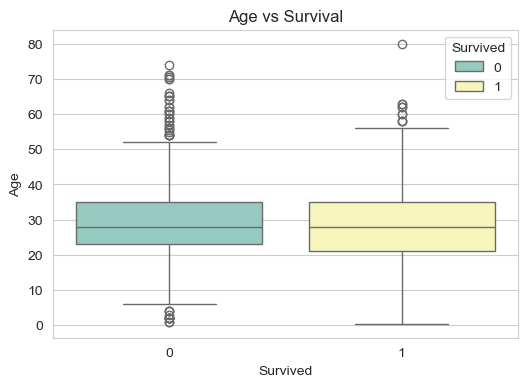

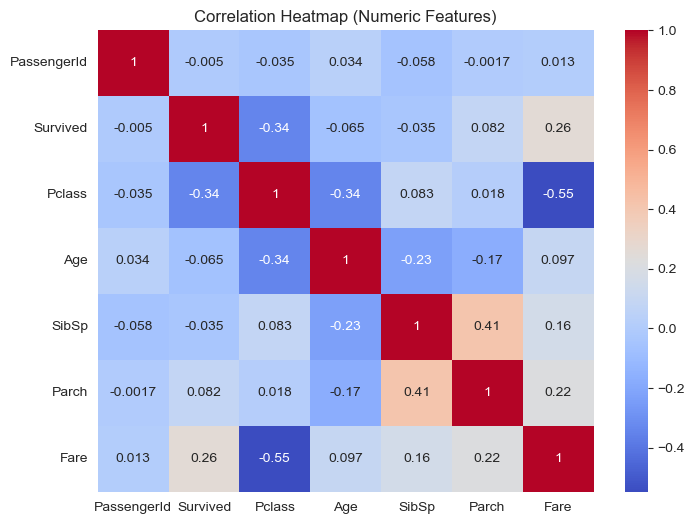

In [8]:
# Titanic Survival Prediction – Exploratory Data Analysis
# < Deepak singh >
# Note: This project is a step-by-step exploratory data analysis (EDA) of the Titanic dataset.  
#I focused on cleaning the data, handling missing values, and visualizing different patterns to understand survival chances.



# 1. Importing libraries
# --First, I import the basic libraries for data handling and visualization.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look clean
sns.set_style("whitegrid")


# 2. Load dataset
#Here I load the Titanic dataset and check its shape.  
#It’s always a good idea to preview the first few rows to understand what the data looks like.

df = pd.read_csv("titanic.csv")
print("Dataset loaded successfully ✅")
print("Shape of dataset:", df.shape)
print(df.head())


# 3. Missing values check
#Real-world datasets often have missing values.  
#before analysis, I check how many missing values each column has.

print("\nMissing values before cleaning:")
print(df.isnull().sum())

# 4. Data Cleaning
# I filled missing `Age` values with the median because it’s less sensitive to outliers.  
# I filled missing `Embarked` values with the most frequent category (mode).  
#- I dropped the `Cabin` column since it has too many missing values.  
# Fill missing Age with median (less sensitive to outliers)
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing Embarked with most frequent value (mode)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop Cabin (too many missing values, low importance for EDA)
if "Cabin" in df.columns:
    df.drop(columns=["Cabin"], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


# 5. Univariate Analysis
#Now I explore individual variables one by one.  
#This helps me understand the distribution of survival, passenger class, and age.
# Survival distribution

plt.figure(figsize=(5,4))
sns.countplot(x="Survived", data=df,hue="Survived", palette="Set2",legend=False)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

# Passenger class distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Pclass", data=df,hue="Pclass", palette="muted",legend=False)
plt.title("Passenger Class Distribution")
plt.show()

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


# 6. Bivariate Analysis
# Next, I compare survival with other features.  
#This reveals relationships, like how gender and passenger class influenced survival chances.

# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Gender")
plt.show()

# Survival by Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Passenger Class")
plt.show()

# Age vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df,hue="Survived", palette="Set3")
plt.title("Age vs Survival")
plt.show()


# 7. Correlation Heatmap
# Finally, I look at correlations between numeric columns.  
#This shows which numerical variables are related to each other.

numeric_df = df.select_dtypes(include=["int64","float64"])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# 8. Small insights (for GitHub README)

# (Not printed, just your notes for project)
# - Women had higher survival rate than men
# - 1st class passengers survived more compared to 3rd class
# - Younger children had slightly higher survival chances
